# TALLER # 3

# CONEXXION TO REPOSITORY

Instalacion de git

In [495]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [496]:
import pandas as pd
#manejo de DataFrames

import numpy as np
#manejo de listas.dicionarios, arrayas

import seaborn as sns
#Graficos rapidos en bases de datos

import matplotlib.pyplot as plt
#manipulacion datos

from sklearn.model_selection import train_test_split
#entrenamiento de modelo

from xgboost import XGBClassifier
#modelo XGBClassifier

from sklearn.metrics import accuracy_score
#calculo

from sklearn.metrics import precision_score
#calculos de presicion

from sklearn.model_selection import validation_curve
#curva de validación

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#matrix de confusion

from sklearn.model_selection import GridSearchCV
# grilla de hiperparámetros

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error
#metricas de medicio

In [497]:
df = pd.read_csv("/content/TALLER-3-BIG-DATA/BBDD_Hospitalización.csv", encoding="latin-1", sep=';')

# informacion basica de la base de datos


*   en este caso es un rango que va desde 0 hasta 569, con un total de 570 entradas.
*   hay un total de 20 columnas en el DataFrame.


# Hallazgos

*   las columnas de dataframe, presentan inconsistencias en sus nombres, los cuales deben ser homologados para su correcta presentacion de la informacion.



In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ï»¿EDAD                                                                     568 non-null    float64
 1   DIABETES                                                                    568 non-null    object 
 2   HOSPITALIZACIÃN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                         564 non-null    object 
 4   BIOPSIAS PREVIAS                                                            566 non-null    object 
 5   VOLUMEN PROSTATICO                                                          567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS           

# Modificacion de columnas

In [499]:
nuevos_nombres = {
    'ï»¿EDAD': 'EDAD',
    'DIABETES': 'DIABETES',
    'HOSPITALIZACIÃN ULTIMO MES': 'HOSPITALIZACION ULTIMO MES',
    'PSA': 'PSA',
    'BIOPSIAS PREVIAS': 'BIOPSIAS PREVIAS',
    'VOLUMEN PROSTATICO': 'VOLUMEN PROSTATICO',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO PROFILAXIS',
    'NUMERO DE MUESTRAS TOMADAS': 'MUESTRAS TOMADAS',
    'CUP': 'CUP',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'ENF CRONICA PULMONAR OBSTRUCTIVA',
    'BIOPSIA': 'BIOPSIA',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÃN INFECCIOSA': 'NUMERO DIAS POST BIOPSIA COMPLICACION INFECCIOSA',
    'FIEBRE': 'FIEBRE',
    'ITU': 'ITU',
    'TIPO DE CULTIVO': 'CULTIVO',
    'AGENTE AISLADO': 'AGENTE AISLADO',
    'PATRON DE RESISTENCIA': 'PATRON DE RESISTENCIA',
    'HOSPITALIZACION': 'HOSPITALIZACION',
    'DIAS HOSPITALIZACION MQ': 'DIAS HOSPITALIZACION MQ',
    'DIAS HOSPITALIZACIÃN UPC': 'DIAS HOSPITALIZACION UPC'
}

df.rename(columns=nuevos_nombres, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   EDAD                                              568 non-null    float64
 1   DIABETES                                          568 non-null    object 
 2   HOSPITALIZACION ULTIMO MES                        568 non-null    object 
 3   PSA                                               564 non-null    object 
 4   BIOPSIAS PREVIAS                                  566 non-null    object 
 5   VOLUMEN PROSTATICO                                567 non-null    object 
 6   ANTIBIOTICO PROFILAXIS                            568 non-null    object 
 7   MUESTRAS TOMADAS                                  568 non-null    float64
 8   CUP                                               568 non-null    object 
 9   ENF CRONICA PULMONAR 

# Validacion de campos nulls

In [500]:
print(df.isnull().sum())

EDAD                                                 2
DIABETES                                             2
HOSPITALIZACION ULTIMO MES                           2
PSA                                                  6
BIOPSIAS PREVIAS                                     4
VOLUMEN PROSTATICO                                   3
ANTIBIOTICO PROFILAXIS                               2
MUESTRAS TOMADAS                                     2
CUP                                                  2
ENF CRONICA PULMONAR OBSTRUCTIVA                     4
BIOPSIA                                              2
NUMERO DIAS POST BIOPSIA COMPLICACION INFECCIOSA     2
FIEBRE                                               2
ITU                                                  2
CULTIVO                                              2
AGENTE AISLADO                                      19
PATRON DE RESISTENCIA                                2
HOSPITALIZACION                                      5
DIAS HOSPI

In [501]:
porcentaje_nulos = df.isnull().sum() / len(df) * 100
print(porcentaje_nulos)

EDAD                                                0.350877
DIABETES                                            0.350877
HOSPITALIZACION ULTIMO MES                          0.350877
PSA                                                 1.052632
BIOPSIAS PREVIAS                                    0.701754
VOLUMEN PROSTATICO                                  0.526316
ANTIBIOTICO PROFILAXIS                              0.350877
MUESTRAS TOMADAS                                    0.350877
CUP                                                 0.350877
ENF CRONICA PULMONAR OBSTRUCTIVA                    0.701754
BIOPSIA                                             0.350877
NUMERO DIAS POST BIOPSIA COMPLICACION INFECCIOSA    0.350877
FIEBRE                                              0.350877
ITU                                                 0.350877
CULTIVO                                             0.350877
AGENTE AISLADO                                      3.333333
PATRON DE RESISTENCIA   

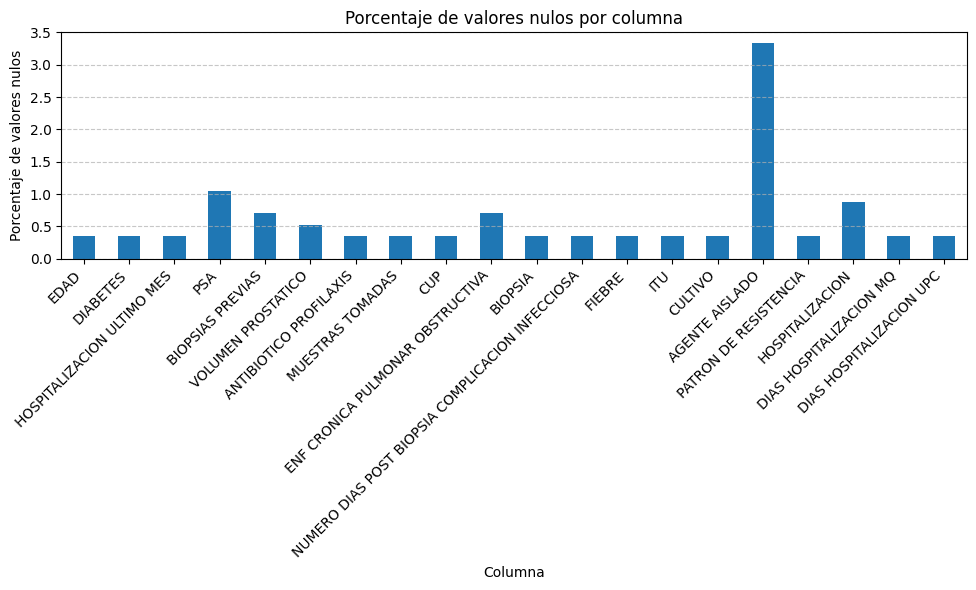

In [502]:
porcentaje_nulos = df.isnull().sum() / len(df) * 100
plt.figure(figsize=(10, 6))
porcentaje_nulos.plot(kind='bar')
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hallazgos

*   la base de datos "trae pocos datos en null",posee una buena proporción de valores nulos en relación con el total de valores en la base de datos.

*   Si el porcentaje resultante es bajo,  se podrías concluir que hay pocos datos faltantes en la base de datos y asi , mejorar la capturar en los campos con mayor porcentaje.






# Homologacion de bases de datos


*   Eliminacion de campos nulls




In [503]:
df_sin_nulos = df.dropna()
print(df_sin_nulos.isnull().sum())

EDAD                                                0
DIABETES                                            0
HOSPITALIZACION ULTIMO MES                          0
PSA                                                 0
BIOPSIAS PREVIAS                                    0
VOLUMEN PROSTATICO                                  0
ANTIBIOTICO PROFILAXIS                              0
MUESTRAS TOMADAS                                    0
CUP                                                 0
ENF CRONICA PULMONAR OBSTRUCTIVA                    0
BIOPSIA                                             0
NUMERO DIAS POST BIOPSIA COMPLICACION INFECCIOSA    0
FIEBRE                                              0
ITU                                                 0
CULTIVO                                             0
AGENTE AISLADO                                      0
PATRON DE RESISTENCIA                               0
HOSPITALIZACION                                     0
DIAS HOSPITALIZACION MQ     

# Modificacion de tipos en variables necesarias

*   Se modifica el tipo de variables para los campos EDAD , NUMERO DE MUESTRAS TOMADAS , DIAS HOSPITALIZACION MQ , DIAS HOSPITALIZACION UPC por un tipo entero.



In [504]:
df_sin_nulos['EDAD'] = df_sin_nulos['EDAD'].astype(int)
df_sin_nulos['MUESTRAS TOMADAS'] = df_sin_nulos['MUESTRAS TOMADAS'].astype(int)
df_sin_nulos['DIAS HOSPITALIZACION MQ'] = df_sin_nulos['DIAS HOSPITALIZACION MQ'].astype(int)
df_sin_nulos['DIAS HOSPITALIZACION UPC'] = df_sin_nulos['DIAS HOSPITALIZACION UPC'].astype(int)

<ipython-input-504-42fb1d4287b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['EDAD'] = df_sin_nulos['EDAD'].astype(int)
<ipython-input-504-42fb1d4287b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['MUESTRAS TOMADAS'] = df_sin_nulos['MUESTRAS TOMADAS'].astype(int)
<ipython-input-504-42fb1d4287b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

# Modificacion de valores a 0 y 1


*  valores "0" y "1" se consideran datos numéricos y serán más adecuados para el modelado con XGBoost




In [505]:
columnas_a_convertir = ['HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'FIEBRE', 'ITU','HOSPITALIZACION']
df_sin_nulos[columnas_a_convertir] = df_sin_nulos[columnas_a_convertir].replace({'SI': 1, 'NO': 0}).astype(int)

<ipython-input-505-dcecea22d4a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos[columnas_a_convertir] = df_sin_nulos[columnas_a_convertir].replace({'SI': 1, 'NO': 0}).astype(int)


# Modificacion de columna PSA


*   modificacion de PSA a tipo float




In [506]:
df_sin_nulos['PSA'] = df_sin_nulos['PSA'].str.replace(',', '.')
df_sin_nulos['PSA'] = df_sin_nulos['PSA'].astype(float)

<ipython-input-506-894806fdb0c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['PSA'] = df_sin_nulos['PSA'].str.replace(',', '.')
<ipython-input-506-894806fdb0c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['PSA'] = df_sin_nulos['PSA'].astype(float)


# Modificacion de valores categoricos

*   TIPO DE CULTIVO
*   AGENTE AISLADO
*   PATRON DE RESISTENCIA

Esto puede ser útil para ahorrar memoria y mejorar la eficiencia de ciertas operaciones, como la agrupación y la ordenación.


In [507]:
columnas_a_convertir = ['CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA']
df_sin_nulos[columnas_a_convertir] = df_sin_nulos[columnas_a_convertir].astype('category')

<ipython-input-507-e588b5e048a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos[columnas_a_convertir] = df_sin_nulos[columnas_a_convertir].astype('category')


# Verificacion de valores atipicos en la EDAD

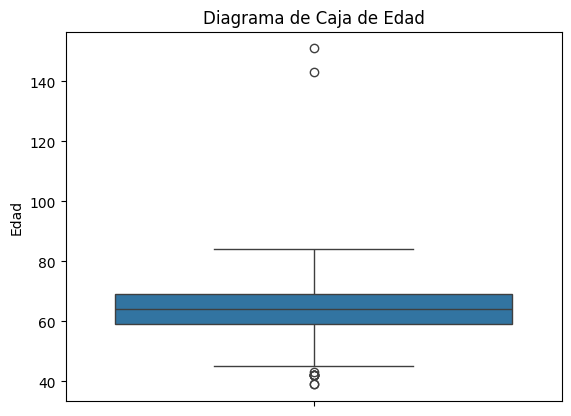

In [508]:
sns.boxplot(y=df_sin_nulos['EDAD'], orient='v')
plt.ylabel('Edad')
plt.title('Diagrama de Caja de Edad')
plt.show()

# Imputacion campos atipicos en campo EDAD


*   Esto garantiza que solo se corrijan los valores atípicos que están por encima de 100 años.



In [509]:
mediana_edad = df_sin_nulos[df_sin_nulos['EDAD'] <= 100]['EDAD'].median()
df_sin_nulos.loc[df_sin_nulos['EDAD'] > 100, 'EDAD'] = mediana_edad

# Homologacion de campos edad mediante la mediana

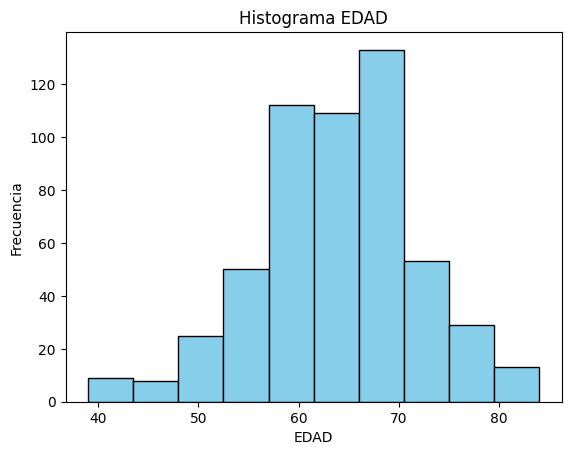

In [510]:
plt.hist(df_sin_nulos['EDAD'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.title('Histograma EDAD')
plt.show()

# Verificacion de campos int y float

In [511]:
variables_num = df_sin_nulos.select_dtypes(include=['float', 'int']).columns
cant_nulls = df_sin_nulos[variables_num].isnull().sum()
print("validacion de campos nulls o vacios")
print(cant_nulls)

validacion de campos nulls o vacios
EDAD                          0
HOSPITALIZACION ULTIMO MES    0
PSA                           0
BIOPSIAS PREVIAS              0
VOLUMEN PROSTATICO            0
MUESTRAS TOMADAS              0
FIEBRE                        0
ITU                           0
HOSPITALIZACION               0
DIAS HOSPITALIZACION MQ       0
DIAS HOSPITALIZACION UPC      0
dtype: int64


# Homologacion de camos que contengan espacios


*   La normalización de datos puede ayudar a mejorar la estabilidad numérica y la convergencia del modelo durante el entrenamiento.




In [512]:
df_sin_nulos = df_sin_nulos.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Verificacion de correlacion de variables
se puede identificar que la variables o campos mas realacionados  y que mas influyen en el modelo son:


*   FIEBRE
*   ITU
*   HOSPITALIZACION
*   DIAS HOSPITALIZACION MQ



<ipython-input-513-0a3ce9090961>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_sin_nulos.corr()


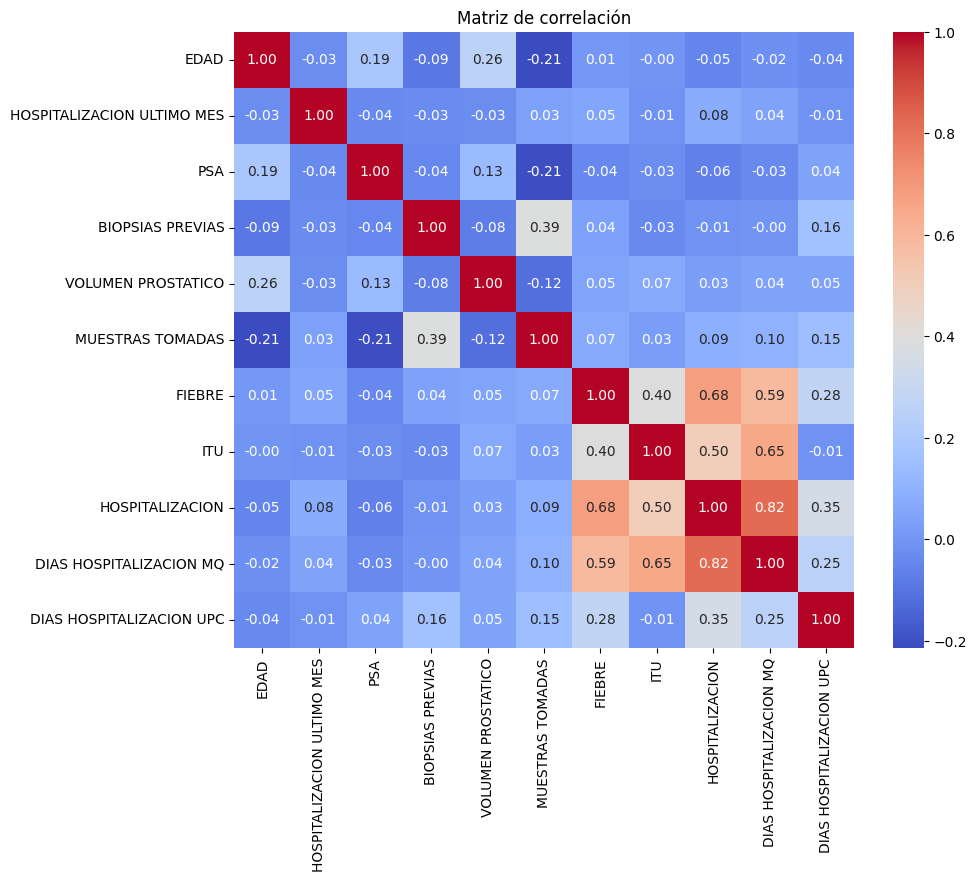

In [513]:
matriz_correlacion = df_sin_nulos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# Modelo XGBoost

*   Número de estimadores (n_estimators): Este hiperparámetro especifica el número de árboles de decisión que se construirán durante el entrenamiento.
*   Profundidad máxima del árbol (max_depth): Este hiperparámetro controla la profundidad máxima de cada árbol de decisión en el modelo.
*   Tasa de aprendizaje (learning_rate): La tasa de aprendizaje controla la contribución de cada árbol al modelo final.
*   Objetivo del modelo (objective):Se entrenará para realizar clasificación binaria utilizando la función de pérdida de regresión logística. Esta configuración es común para problemas de clasificación binaria donde se desea predecir la probabilidad de que ocurra un evento.

In [514]:
features = ["EDAD","VOLUMEN PROSTATICO","MUESTRAS TOMADAS","FIEBRE","ITU","PSA","BIOPSIAS PREVIAS"]
X = df_sin_nulos[features]
y = df_sin_nulos['HOSPITALIZACION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(n_estimators=2, max_depth=3, learning_rate=1, objective='binary:logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Optimizacion de hiperparámetros

 se realiza una búsqueda exhaustiva de hiperparámetros para encontrar la combinación óptima que maximiza la precisión del modelo XGBoost en los datos de entrenamiento y prueba.
 Esto te permite ajustar los hiperparámetros de tu modelo para obtener el mejor rendimiento posible.

 llevado a cabo dicha busqueda podemos identificar que:



*   Mejores hiperparámetros : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic'}
*   Mejora en la precision 0.981651376146789






In [515]:
param_grid = {
    'max_depth': [3, 4, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'objective': ['binary:logistic']
}
xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del mejor modelo:", accuracy)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic'}
Precisión del mejor modelo: 0.981651376146789


# Curva de validacion


*   Se evidencia que la curva de validacion aplicada al campo  profundidad del árbol, concuerda con la especificada en la Optimizacion de hiperparámetros




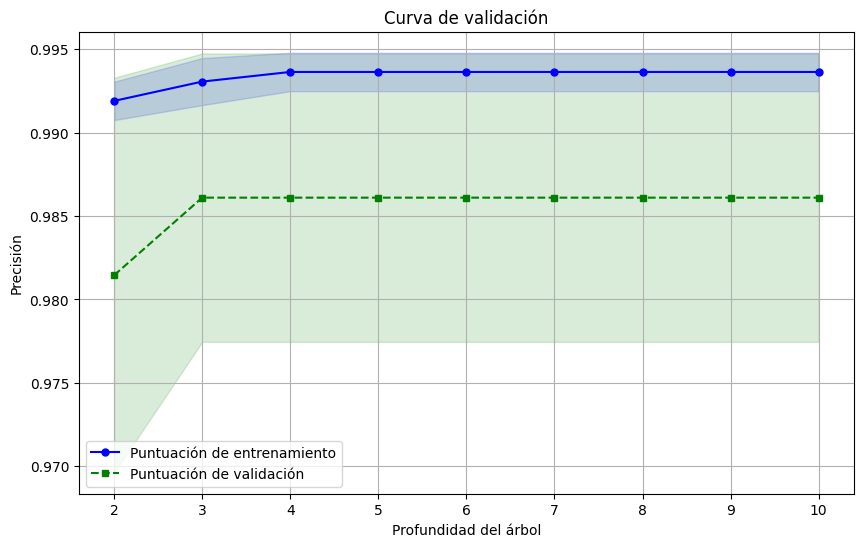

In [516]:
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]  #profundidad del árbol

# Calcular las puntuaciones de entrenamiento y prueba para el rango de valores del hiperparámetro
train_scores, test_scores = validation_curve(
    estimator=XGBClassifier(n_estimators=100, random_state=42),  # Modelo XGBoost
    X=X_train,
    y=y_train,
    param_name="max_depth",  # Nombre del hiperparámetro que deseas evaluar
    param_range=param_range,  # Rango de valores para el hiperparámetro
    cv=5  # Número de divisiones para la validación cruzada
)

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Puntuación de entrenamiento')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Puntuación de validación')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de validación')
plt.grid()
plt.show()

#  métricas de evaluación

In [517]:
# Precisión (Accuracy)
accuracy_score(y_test, y_pred)


0.981651376146789

El modelo ha realizado predicciones correctas en el 98.17% de las muestras en el conjunto de datos de prueba. En otras palabras, de todas las muestras en el conjunto de prueba, el 98.17% de ellas fueron clasificadas correctamente por el modelo.

In [518]:
# Recall (Sensibilidad)
recall_score(y_test, y_pred)

0.7777777777777778

El modelo identificó correctamente el 77.78% de todas las muestras positivas en el conjunto de datos de prueba. En otras palabras, de todas las muestras que realmente pertenecían a la clase positiva en el conjunto de prueba, el 77.78% de ellas fueron correctamente identificadas por el modelo como positivas.

In [519]:
# Precisión
precision_score(y_test, y_pred)

1.0

In [520]:
 # F1-score
 f1_score(y_test, y_pred)

0.8750000000000001

indica un rendimiento bastante bueno del modelo en términos de la combinación de precisión y recall.

In [521]:
mean_squared_error(y_test, y_pred)

0.01834862385321101

se evidencia que en las predicciones del modelo están bastante cerca de los valores reales en promedio. Esto indica un buen ajuste del modelo a los datos de prueba en términos de la predicción de la variable objetivo.

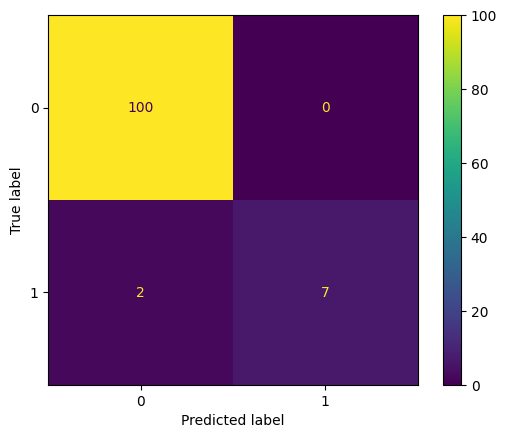

In [522]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()